## Importing Libraries

In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from numpy.linalg import inv

## Loading Dataset

In [68]:
col_names=("top-left-square","top-middle-square","top-right-square","middle-left-square","middle-middle-square",
           "middle-right-square","bottom-left-square","bottom-middle-square","bottom-right-square", "Class")

dataset_path = "Dataset/tic-tac-toe.data" 

df = pd.read_csv(dataset_path, sep=',', delimiter=None, header = 'infer', names=col_names)

In [69]:
df

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


## Exercise 0: Dataset preprocessing 

### Part A) Converting All Non-Numeric Columns to Numeric

In [70]:
df.dtypes

top-left-square         object
top-middle-square       object
top-right-square        object
middle-left-square      object
middle-middle-square    object
middle-right-square     object
bottom-left-square      object
bottom-middle-square    object
bottom-right-square     object
Class                   object
dtype: object

###### Change the value of positve to 1 and negative to 0 of target column and then convert the type to int.

In [71]:
df.Class[df.Class == 'positive'] = 1
df.Class[df.Class == 'negative'] = 0

In [74]:
df['Class'] = df.Class.astype(int)

###### In the given data all the columns were non-numeric. Therefore, they have been converted to numeric form using ‘one-hot encoding’. One-hot encoding has been implemented using ‘pd.get_dummies’ function from pandas

In [75]:
df = pd.get_dummies(df)
df.head()

,Class,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
0,1,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [76]:
df.dtypes

Class                     int32
top-left-square_b         uint8
top-left-square_o         uint8
top-left-square_x         uint8
top-middle-square_b       uint8
top-middle-square_o       uint8
top-middle-square_x       uint8
top-right-square_b        uint8
top-right-square_o        uint8
top-right-square_x        uint8
middle-left-square_b      uint8
middle-left-square_o      uint8
middle-left-square_x      uint8
middle-middle-square_b    uint8
middle-middle-square_o    uint8
middle-middle-square_x    uint8
middle-right-square_b     uint8
middle-right-square_o     uint8
middle-right-square_x     uint8
bottom-left-square_b      uint8
bottom-left-square_o      uint8
bottom-left-square_x      uint8
bottom-middle-square_b    uint8
bottom-middle-square_o    uint8
bottom-middle-square_x    uint8
bottom-right-square_b     uint8
bottom-right-square_o     uint8
bottom-right-square_x     uint8
dtype: object

### Part B) Checking Data Balance

<p>Data imbalance usually reflects an unequal distribution of classes within a dataset. For example, in a credit card fraud detection dataset, most of the credit card transactions are not fraud and a very few classes are fraud transactions. In our case, the options classified as ‘positive’ are more than the options classified as ‘negative’. This dataset has an unequal distribution of classes and hence is unbalanced.</p>

In [77]:
def check_balance(dataframe):
    pos_class = dataframe.Class.value_counts()[1]
    neg_class = dataframe.Class.value_counts()[0]

    print("Percentage of positive class: "+str(pos_class))
    print("Percentage of positive class: "+str(neg_class))

    if (pos_class > neg_class):
        print("Percentage of positive class is higher than negative, unbalanced dataset!")
    elif (neg_class > pos_class):
        print("Percentage of negative class is higher than positive, unbalanced dataset!")
    else:
        print("balanced dataset!")
    return

#### The percentages of rows with ‘positive’ label and ‘negative’ label have been calculated respectively. The percentage of rows with ‘positive’ label is greater than that of ‘negative’ label.

In [78]:
check_balance(df)

Percentage of positive class: 626
Percentage of positive class: 332
Percentage of positive class is higher than negative, unbalanced dataset!


#### Stratified Sampling:

<p>As in the given dataset, when the distribution of classes is unequal, it is better to use stratified sampling
for training the model. Stratified sampling is a method of sampling in which the data is divided into two
groups and probability samples are drawn from each group.<p>

In [79]:
def stratified (dataframe):
    
    n = min(332, dataframe.Class.value_counts().min())
    df2 = dataframe.groupby('Class').apply(lambda x: x.sample(n))
    df2.index = df2.index.droplevel(0)
    return df2

In [80]:
df1 = stratified(df)
df1

,Class,top-left-square_b,top-left-square_o,top-left-square_x,top-middle-square_b,top-middle-square_o,top-middle-square_x,top-right-square_b,top-right-square_o,top-right-square_x,...,middle-right-square_x,bottom-left-square_b,bottom-left-square_o,bottom-left-square_x,bottom-middle-square_b,bottom-middle-square_o,bottom-middle-square_x,bottom-right-square_b,bottom-right-square_o,bottom-right-square_x
788,0,0,1,0,0,0,1,1,0,0,...,1,1,0,0,1,0,0,0,1,0
892,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
654,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
709,0,0,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
939,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1,0,1,0,1,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,1
469,1,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
193,1,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
477,1,0,1,0,1,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,0


In [83]:
print('Before Stratified Sampling')
print(df.Class.value_counts())


print('\n\nAfter Stratified Sampling')
print(df1.Class.value_counts())

Before Stratified Sampling
1    626
0    332
Name: Class, dtype: int64


After Stratified Sampling
1    332
0    332
Name: Class, dtype: int64


### Part C) Splitting data into X, Y Train and Test Sets

In [93]:
Y = df1.iloc[:,0] # Getting class column as target

In [94]:
X = df1.iloc[:,1:]

In [95]:
X_train = X.sample(frac=0.80, random_state=0)
X_test = X.drop(X_train.index)

In [96]:
Y_train = Y.sample(frac=0.80, random_state=0)
Y_test = Y.drop(Y_train.index)

## Exercise 1: Logistic Regression with Gradient Descent

In [97]:
def y_prediction(X_data, beta):
    beta = np.dot(X_data, beta)
    y_predict = np.exp(beta) / (1 + np.exp(beta))
    return y_predict

#### The following function is created for the log-likelihood of logistic regression:

In [98]:
def loss(X_data, Y_data, beta):
    y_predict = y_prediction(X_data, beta)
    loss = (Y_data * np.log(y_predict)) + ((1 - Y_data)*np.log(1 - y_predict))
    loss = sum(loss)
    return loss

In [99]:
def derivativeEq(X_data, Y_data,beta):
    y_predict = y_prediction(X_data , beta)
    y_calculated = Y_data - y_predict
    derivative = np.dot(X_data.T, y_calculated)
    return derivative

#### The ‘bold driver step length’ algorithm is used for controlling the step length in the Gradient ascend. The following code snippet is the function created for bold driver step length algorithm.

In [100]:
def bold_driver(beta, X_data, Y_data, alpha, alphaP, alphaM):
    alpha = alpha * alphaP
    right = loss(X_data, Y_data, beta + alpha * derivativeEq(X_data, Y_data, beta))
    left = loss(X_data,Y_data,beta)   
    while right - left < 0:      
        alpha = alpha * alphaM
        right = loss(X_data, Y_data, beta + alpha * derivativeEq(X_data, Y_data, beta))
        left = loss(X_data,Y_data,beta)        
    return alpha

#### Gradient ascend is applied in order to optimize the log likelihood function. The difference between the new and old function values is calculated in every iteration of the gradient ascend until the stopping condition is reached (i.e. very small difference). Also, the log loss on test set is calculated in every iteration and plotted against the number of iterations.

In [109]:
def regression(X_data, Y_data, X_test, Y_test, lr, theta, lrp):
    log_loss =[]
    difference = []
    beta = np.random.rand((X_data.shape[1]))
    updated_loss = loss(X_data, Y_data, beta)
    
    for i in range(100):
        lr = bold_driver(beta, X_data, Y_data, lr, theta, lrp)
        y_predict = y_prediction(X_data, beta)
        beta = beta + (lr*np.dot(X_data.T,  Y_data - y_predict))
        previous_loss = updated_loss
        updated_loss = loss(X_data,Y_data,beta) 
        
        difference.append(np.absolute(updated_loss-previous_loss))
        log_loss.append(np.absolute(loss(X_test,Y_test,beta)))
        
        if((updated_loss - previous_loss) <= 0.00001):
            break
    
    return log_loss , difference

In [110]:
log_loss , difference = regression(X_train,Y_train,X_test,Y_test,0.0001,1,0.5)

Text(0, 0.5, 'Log loss')

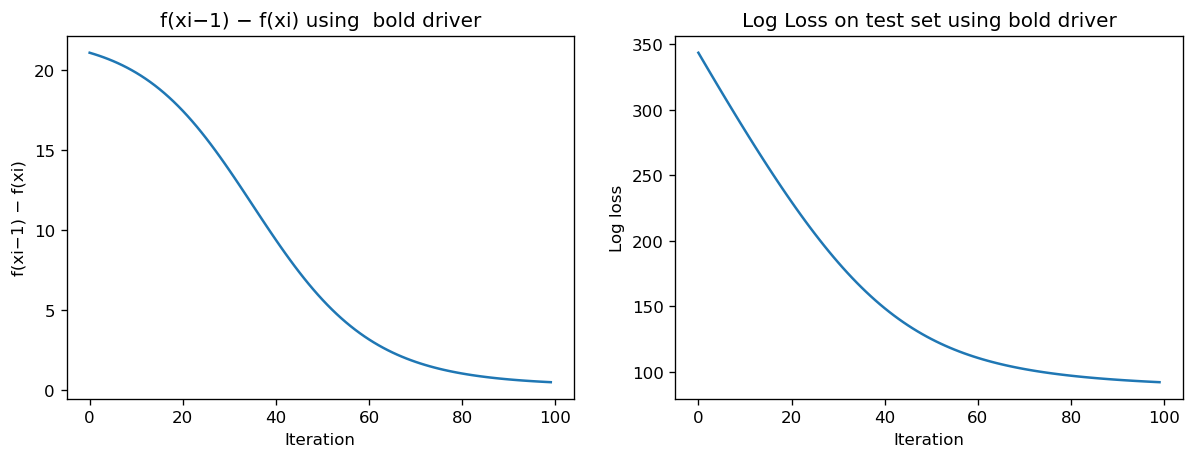

In [115]:
plt.figure(figsize=(12,4), dpi=120)
plt.subplot(1,2,1)

plt.plot(difference)
plt.title("f(xi−1) − f(xi) using  bold driver")
plt.xlabel('Iteration')
plt.ylabel('f(xi−1) − f(xi)')

plt.subplot(1,2,2)
plt.plot(log_loss)
plt.title("Log Loss on test set using bold driver")
plt.xlabel("Iteration")
plt.ylabel("Log loss")

####  I set the iterations count to 100 and within 60 iteration it reaches to optimal value while after 60th iteration it converages slowly. The difference of the function values and log loss is decreasing with increasing number of iterations.


## Exercise 2: Implement Newton Algorithm for Logistic Regression

In [136]:
def Newton(X_data, Y_data, X_test, Y_test, mu):
    log_loss =[]
    difference = []
    beta = np.zeros((X_data.shape[1])) 
    updated_loss = loss(X_data,Y_data,beta)
    
    for i in range(100):
        d = np.diag(np.dot(np.matrix(y_prediction(X_data, beta)).T, np.matrix((1 - y_prediction(X_data, beta)))))
        d = np.diagflat(d)
        eq = derivativeEq(X_data, Y_data, beta)
        x = np.dot(d, X_data)
        y = np.dot(X_data.T, x)
        z = inv(y)
        beta = beta + mu * (np.dot(z, eq))
        
        previous_loss = updated_loss
        updated_loss = loss(X_data, Y_data, beta) + 0.5
        # added +0.5 bias for better understanding in graph
        difference.append((updated_loss - previous_loss))
        log_loss.append(np.absolute(loss(X_test,Y_test,beta)))
        
        if((updated_loss - previous_loss) <= 0.00001 ):
            break
            
    return log_loss , difference

#### The difference between the new and old function values is calculated in every iteration of the gradient ascend until the stopping condition is reached (i.e. very small difference)

In [137]:
log_loss_n , difference_n = Newton(X_train,Y_train,X_test,Y_test,0.00001)

Text(0, 0.5, 'Log loss')

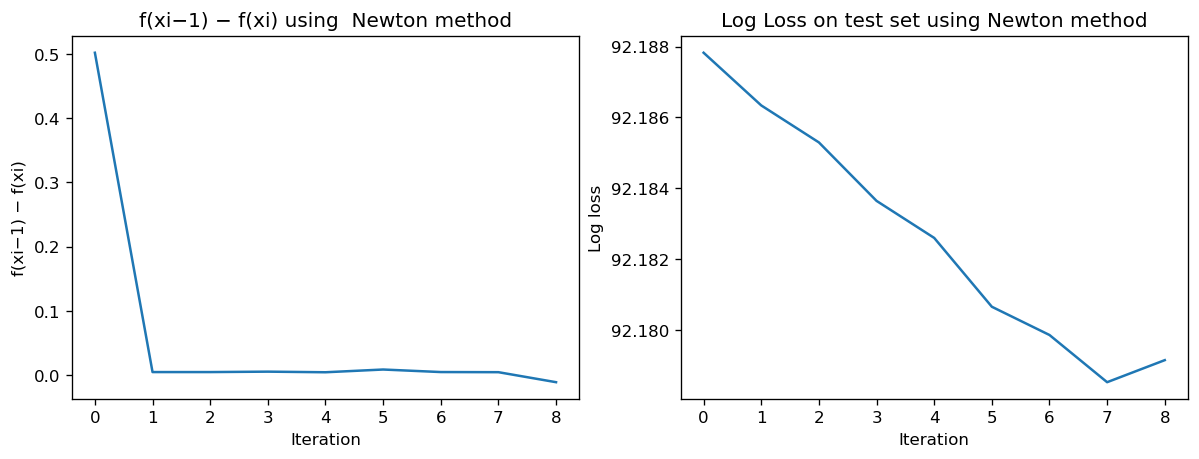

In [138]:
plt.figure(figsize=(12,4), dpi=120)

plt.subplot(1,2,1)
plt.plot(difference_n)
plt.title("f(xi−1) − f(xi) using  Newton method")
plt.xlabel('Iteration')
plt.ylabel('f(xi−1) − f(xi)')

plt.subplot(1,2,2)
plt.plot(log_loss_n)
plt.title("Log Loss on test set using Newton method")
plt.xlabel("Iteration")
plt.ylabel("Log loss")

###### Using Newton, within 7 iterations it reaches to criteria which is difference between 2 consective loss is less then or equal to 0.00001. Almost after 1st iteration it reaches to optimal value.  The difference of the function values and log loss is decreasing with increasing number of iterations.

## Comparison of the Two Methods:

#### The results of logistic regression with bold driver step length and newton algorithm are compared below (both with 100 epochs):

Text(0.5, 1.0, 'Log Loss using Newton')

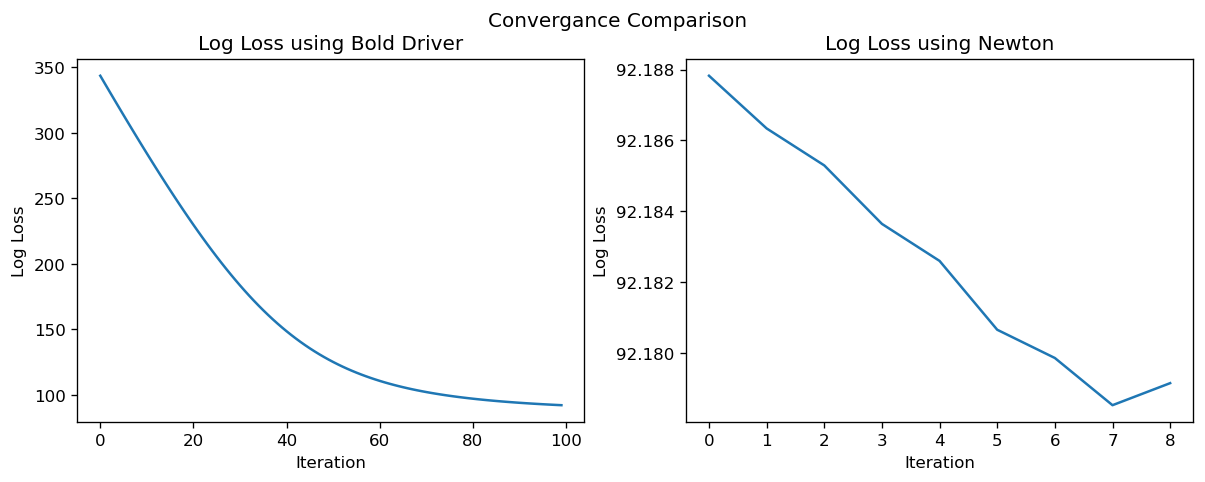

In [139]:
plt.figure(figsize=(12,4), dpi=120)
plt.suptitle("Convergance Comparison")
plt.subplot(1,2,1)
plt.plot(log_loss)
plt.title("Log Loss using Bold Driver")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")

plt.subplot(1,2,2)
plt.plot(log_loss_n)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Log Loss using Newton")

#### With same criteria which is difference between 2 consective loss is less then or equal to 0.00001, the Newton method performed well with in few iterations. It is clear that ‘Newton’ method has converged in 7 iterations which is faster than ‘Bold Driver Step Length’.